# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import tensorflow as tf
tf.test.is_gpu_available()

In [3]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 13s 0us/step


### 2. Visualize the First 24 Training Images

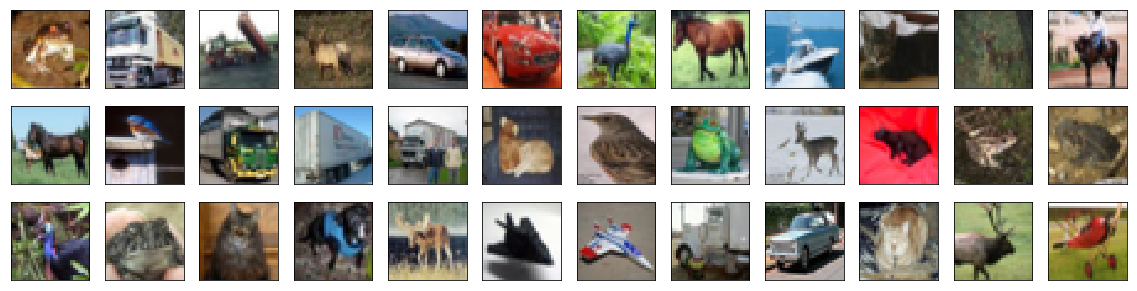

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [6]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [9]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 49s - loss: 1.5759 - acc: 0.4288 - val_loss: 1.4143 - val_acc: 0.4906

Epoch 00001: val_loss improved from inf to 1.41431, saving model to model.weights.best.hdf5
Epoch 2/100
 - 9s - loss: 1.2609 - acc: 0.5522 - val_loss: 1.1067 - val_acc: 0.6124

Epoch 00002: val_loss improved from 1.41431 to 1.10673, saving model to model.weights.best.hdf5
Epoch 3/100
 - 9s - loss: 1.1366 - acc: 0.5971 - val_loss: 0.9720 - val_acc: 0.6528

Epoch 00003: val_loss improved from 1.10673 to 0.97197, saving model to model.weights.best.hdf5
Epoch 4/100
 - 9s - loss: 1.0668 - acc: 0.6257 - val_loss: 1.0364 - val_acc: 0.6444

Epoch 00004: val_loss did not improve from 0.97197
Epoch 5/100
 - 9s - loss: 1.0276 - acc: 0.6415 - val_loss: 0.9676 - val_acc: 0.6578

Epoch 00005: val_loss improved from 0.97197 to 0.96765, saving model to model.weights.best.hdf5
Epoch 6/100
 - 9s - loss: 1.0080 - acc: 0.6506 - val_loss: 0.9091 - val_acc: 0.6866

Epoch 000

 - 9s - loss: 1.7547 - acc: 0.4007 - val_loss: 1.5504 - val_acc: 0.4390

Epoch 00059: val_loss did not improve from 0.90909
Epoch 60/100
 - 9s - loss: 1.7535 - acc: 0.4032 - val_loss: 1.9177 - val_acc: 0.4220

Epoch 00060: val_loss did not improve from 0.90909
Epoch 61/100
 - 9s - loss: 1.7574 - acc: 0.3974 - val_loss: 1.6056 - val_acc: 0.4184

Epoch 00061: val_loss did not improve from 0.90909
Epoch 62/100
 - 9s - loss: 1.7524 - acc: 0.3970 - val_loss: 1.5673 - val_acc: 0.4142

Epoch 00062: val_loss did not improve from 0.90909
Epoch 63/100
 - 9s - loss: 1.7559 - acc: 0.3898 - val_loss: 1.5215 - val_acc: 0.4402

Epoch 00063: val_loss did not improve from 0.90909
Epoch 64/100
 - 9s - loss: 1.7720 - acc: 0.3858 - val_loss: 1.8713 - val_acc: 0.4252

Epoch 00064: val_loss did not improve from 0.90909
Epoch 65/100
 - 9s - loss: 1.7633 - acc: 0.3895 - val_loss: 1.5695 - val_acc: 0.4450

Epoch 00065: val_loss did not improve from 0.90909
Epoch 66/100
 - 9s - loss: 1.7786 - acc: 0.3854 - val_

Plot our first cnn architecture:
    
- 3 hidden layers (16, 32, 64 filters)
- Max pooling and dropouts of .3
- Final dense layer of 500 
- `rmsprop` optimizer

- batch size == 32 with 100 epochs

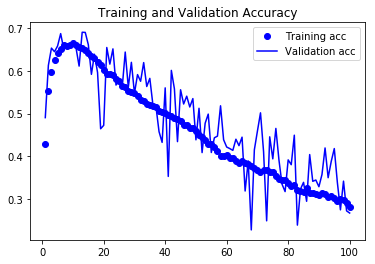

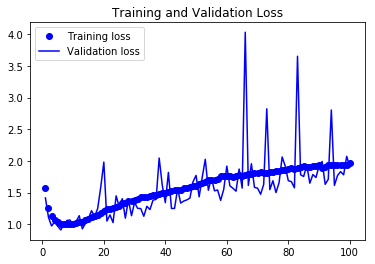

In [15]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# 7.2 - New Architecture Part II

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_two = Sequential()
model_two.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model_two.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_two.add(MaxPooling2D(pool_size=2))
model_two.add(Dropout(.25))

model_two.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model_two.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model_two.add(MaxPooling2D(pool_size=2))
model_two.add(Dropout(0.25))

model_two.add(Flatten())
model_two.add(Dense(512, activation='relu'))
model_two.add(Dropout(0.5))
model_two.add(Dense(10, activation='softmax'))

model_two.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
__________

In [37]:
# compile the model
from keras import optimizers
model_two.compile(loss='categorical_crossentropy', 
                  optimizer=optimizers.rmsprop(lr=.0001, decay=1e-6), 
                  metrics=['accuracy'])

In [38]:
# train the model
checkpointer_two = ModelCheckpoint(filepath='model_two.weights.best.hdf5', verbose=1, 
                                   save_best_only=True)
hist_two = model_two.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer_two], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 16s - loss: 1.9348 - acc: 0.3004 - val_loss: 1.6997 - val_acc: 0.3900

Epoch 00001: val_loss improved from inf to 1.69965, saving model to model_two.weights.best.hdf5
Epoch 2/100
 - 16s - loss: 1.6113 - acc: 0.4236 - val_loss: 1.4681 - val_acc: 0.4786

Epoch 00002: val_loss improved from 1.69965 to 1.46809, saving model to model_two.weights.best.hdf5
Epoch 3/100
 - 16s - loss: 1.4583 - acc: 0.4794 - val_loss: 1.3481 - val_acc: 0.5120

Epoch 00003: val_loss improved from 1.46809 to 1.34813, saving model to model_two.weights.best.hdf5
Epoch 4/100
 - 16s - loss: 1.3573 - acc: 0.5172 - val_loss: 1.2990 - val_acc: 0.5502

Epoch 00004: val_loss improved from 1.34813 to 1.29898, saving model to model_two.weights.best.hdf5
Epoch 5/100
 - 16s - loss: 1.2867 - acc: 0.5428 - val_loss: 1.2948 - val_acc: 0.5402

Epoch 00005: val_loss improved from 1.29898 to 1.29484, saving model to model_two.weights.best.hdf5
Epoch 6/100
 - 16s - loss

 - 16s - loss: 0.7637 - acc: 0.7416 - val_loss: 0.7897 - val_acc: 0.7420

Epoch 00053: val_loss did not improve from 0.73245
Epoch 54/100
 - 16s - loss: 0.7616 - acc: 0.7424 - val_loss: 0.7810 - val_acc: 0.7432

Epoch 00054: val_loss did not improve from 0.73245
Epoch 55/100
 - 16s - loss: 0.7635 - acc: 0.7439 - val_loss: 0.7425 - val_acc: 0.7478

Epoch 00055: val_loss did not improve from 0.73245
Epoch 56/100
 - 16s - loss: 0.7612 - acc: 0.7432 - val_loss: 0.7499 - val_acc: 0.7466

Epoch 00056: val_loss did not improve from 0.73245
Epoch 57/100
 - 16s - loss: 0.7611 - acc: 0.7452 - val_loss: 0.7622 - val_acc: 0.7492

Epoch 00057: val_loss did not improve from 0.73245
Epoch 58/100
 - 16s - loss: 0.7610 - acc: 0.7443 - val_loss: 0.7473 - val_acc: 0.7464

Epoch 00058: val_loss did not improve from 0.73245
Epoch 59/100
 - 16s - loss: 0.7580 - acc: 0.7449 - val_loss: 0.7784 - val_acc: 0.7522

Epoch 00059: val_loss did not improve from 0.73245
Epoch 60/100
 - 16s - loss: 0.7530 - acc: 0.746

Plot second architecture

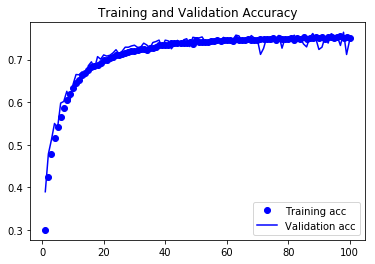

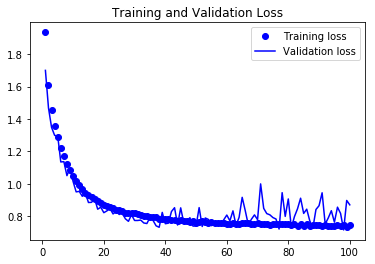

In [39]:
acc_two = hist_two.history['acc']
val_acc_two = hist_two.history['val_acc']
loss_two = hist_two.history['loss']
val_loss_two = hist_two.history['val_loss']

epochs_two = range(1, len(acc_two) + 1)

plt.plot(epochs_two, acc_two, 'bo', label='Training acc')
plt.plot(epochs_two, val_acc_two, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_two, loss_two, 'bo', label='Training loss')
plt.plot(epochs_two, val_loss_two, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### 8. Load the Model with the Best Validation Accuracy

In [40]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

model_two.load_weights('model_two.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [43]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
score_two = model_two.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy - Model 1:', score[1])
print('\n', 'Test accuracy - Model 2:', score_two[1])


 Test accuracy - Model 1: 0.6845

 Test accuracy - Model 2: 0.7605


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [44]:
# get predictions on the test set
y_hat = model.predict(x_test)
y_hat_two = model_two.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

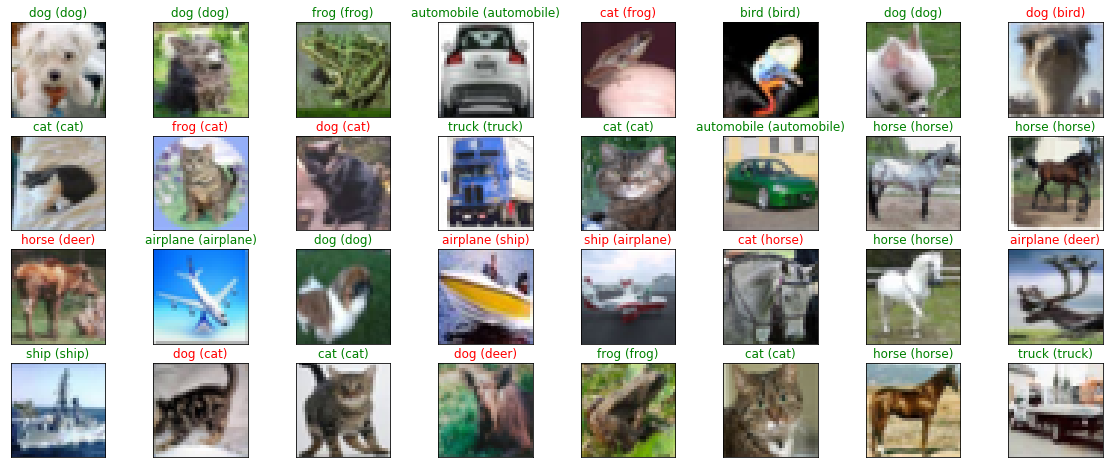

In [24]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

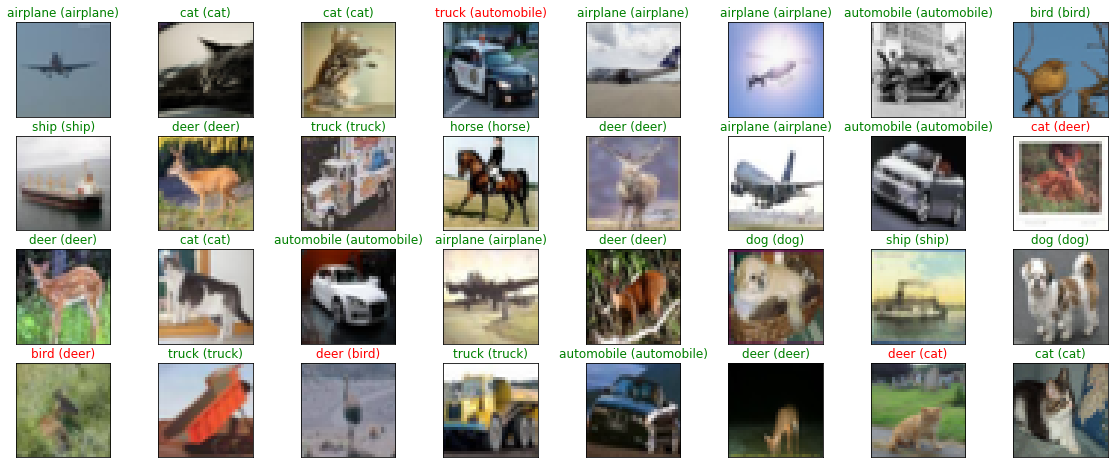

In [45]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat_two[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))